## 0. Bag Of Words


In [ ]:
#!/usr/bin/env python3
""" Bag of words """
from sklearn.feature_extraction.text import CountVectorizer


def bag_of_words(sentences, vocab=None):
    "creates a bag of words embedding matrix"
    vectorizer = CountVectorizer(vocabulary=vocab)
    X = vectorizer.fit_transform(sentences)
    features = vectorizer.get_feature_names()
    embeddings = X.toarray()

    return embeddings, features


In [ ]:
sentences = ["Holberton school is Awesome!",
             "Machine learning is awesome",
             "NLP is the future!",
             "The children are our future",
             "Our children's children are our grandchildren",
             "The cake was not very good",
             "No one said that the cake was not very good",
             "Life is beautiful"]
E, F = bag_of_words(sentences)
print(E)
print(F)


[[0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [1 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1]
 [0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]]
['are', 'awesome', 'beautiful', 'cake', 'children', 'future', 'good', 'grandchildren', 'holberton', 'is', 'learning', 'life', 'machine', 'nlp', 'no', 'not', 'one', 'our', 'said', 'school', 'that', 'the', 'very', 'was']


## 1. TF-IDF


TF-IDF: weigh down the common words that occur in almost every document (e.g. “the” or “a”) and give more importance to those that appear only in a few documents.

**TF IDF** is composed of two parts: 

TF which is the term frequency of a word, i.e. the count of the word occurring in a document 

IDF which is the inverse document frequency, i.e. the weight component that gives higher weight to words occuring in only a few documents.

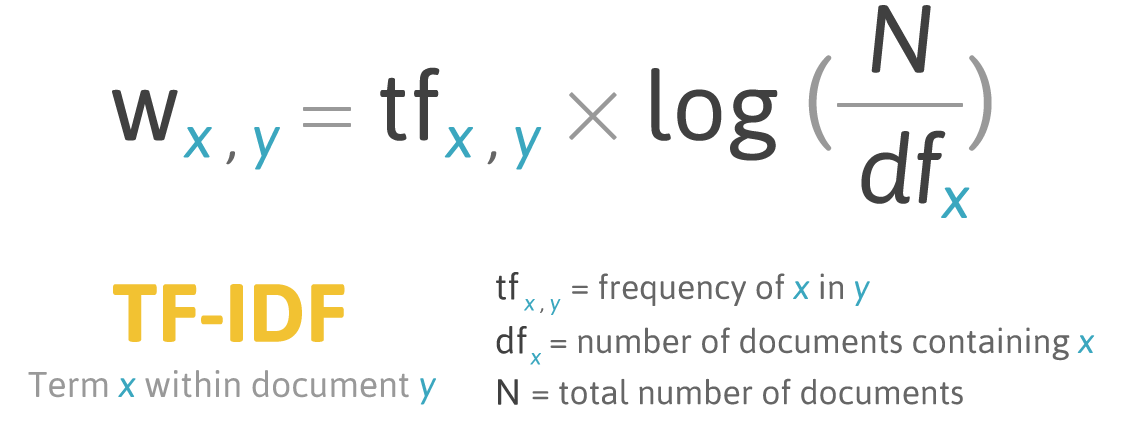

In [ ]:
#!/usr/bin/env python3
""" TF-IDF """
from sklearn.feature_extraction.text import TfidfVectorizer


def tf_idf(sentences, vocab=None):
    "create a TF-IDF embedding"
    vectorizer = TfidfVectorizer(vocabulary=vocab)
    X = vectorizer.fit_transform(sentences)
    features = vectorizer.get_feature_names()
    embeddings = X.toarray()

    return embeddings, features


In [ ]:
sentences = ["Holberton school is Awesome!",
             "Machine learning is awesome",
             "NLP is the future!",
             "The children are our future",
             "Our children's children are our grandchildren",
             "The cake was not very good",
             "No one said that the cake was not very good",
             "Life is beautiful"]
vocab = ["awesome", "learning", "children", "cake", "good", "none", "machine"]
E, F = tf_idf(sentences, vocab)
print(E)
print(F)

[[1.         0.         0.         0.         0.         0.
  0.        ]
 [0.5098139  0.60831315 0.         0.         0.         0.
  0.60831315]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         1.         0.         0.         0.
  0.        ]
 [0.         0.         1.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.70710678 0.70710678 0.
  0.        ]
 [0.         0.         0.         0.70710678 0.70710678 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]
['awesome', 'learning', 'children', 'cake', 'good', 'none', 'machine']


## 2. Train Word2Vec


Gensim is a free open-source Python library for representing documents as semantic vectors, as efficiently (computer-wise) and painlessly (human-wise) as possible.



The algorithms in Gensim, such as Word2Vec, FastText, Latent Semantic Indexing (LSI, LSA, LsiModel), Latent Dirichlet Allocation (LDA, LdaModel) etc, automatically discover the semantic structure of documents by examining statistical co-occurrence patterns within a corpus of training documents. These algorithms are unsupervised, which means no human input is necessary – you only need a corpus of plain text documents.

The word2vec algorithms include skip-gram and CBOW models, using either hierarchical softmax or negative sampling:

There are more ways to train word vectors in Gensim than just Word2Vec. See also Doc2Vec, FastText.

In the CBOW model, the distributed representations of context (or surrounding words) are combined to predict the word in the middle. While in the Skip-gram model, the distributed representation of the input word is used to predict the context.

In [ ]:
#!/usr/bin/env python3
"""train Word2Vec"""
from gensim.models import Word2Vec


def word2vec_model(sentences, size=100, min_count=5, window=5, negative=5,
                   cbow=True, iterations=5, seed=0, workers=1):
    "create and trains a gensim word2vec model"

    model = Word2Vec(sentences=sentences, size=size, min_count=min_count,
                                   window=window, negative=negative, sg= not cbow, seed=seed,
                                   iter=iterations, workers=workers)
    model.train(sentences, total_examples=model.corpus_count, epochs=model.iter)  # train word vectors
    return model

In [ ]:
# a student 
  
#!/usr/bin/env python3
"""
Gensim Word2vec model
"""

from gensim.models import Word2Vec


def word2vec_model(sentences, size=100, min_count=5, window=5,
                   negative=5, cbow=True, iterations=5, seed=0,
                   workers=1):
    """
    Creates and trains a gensim word2vec model
    sentences is a list of sentences to be trained on
    size: dimensionality of the embedding layer
    min_count: minimum number of occurrences of a word
      for use in training
    window: maximum distance between the current and
      predicted word within a sentence
    negative: size of negative sampling
    cbow is a boolean to determine the training type; True is
      for CBOW; False is for Skip-gram
    iterations: number of iterations to train over
    seed: seed for the random number generator
    workers: number of worker threads to train the model
    Returns: the trained model
    """
    if cbow is True:
        sk_gr = 0
    else:
        sk_gr = 1
    model = Word2Vec(size=size, window=window,
                     min_count=min_count, workers=workers,
                     sg=sk_gr, negative=negative, seed=seed)

    model.build_vocab(sentences)
    model.train(sentences, total_examples=model.corpus_count,
                epochs=iterations)
    return model

In [ ]:
model=word2vec_model(common_texts, min_count=1)

In [ ]:
model.epochs

5

In [ ]:
from gensim.test.utils import common_texts

print(common_texts[:2])
w2v = word2vec_model(common_texts, min_count=1)
print(w2v.wv["computer"])

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time']]
[-0.00051294 -0.00454825 -0.00449282  0.00208968  0.00190135 -0.00257408
 -0.0037952   0.00083038 -0.00344046 -0.00417624 -0.00471777 -0.00431017
  0.0033582   0.00366557  0.00156012 -0.00036913  0.00181714 -0.00140343
  0.00405343  0.00183674  0.00088651  0.00063655  0.00438162 -0.0013597
  0.00018472  0.00402027 -0.00182147 -0.0014861  -0.00079005 -0.00479331
 -0.00031221 -0.00421808  0.00051037 -0.00094559 -0.0048743  -0.00416472
 -0.00335391 -0.00257695  0.00128371  0.00258728 -0.00467143  0.00318812
  0.00390237  0.00153321 -0.00312101  0.00375382 -0.00199921  0.00283439
  0.00497019  0.00065175  0.00398509 -0.00213521 -0.00015236 -0.00251468
 -0.00326579 -0.00414581 -0.00418789  0.00335902  0.00021576 -0.00074238
  0.00234993  0.00336386 -0.00446661  0.00226955  0.00185275  0.00438569
  0.00264384  0.00234481  0.00032235  0.00144786  0.00446564  0.00386745
 -0.00232575  0.00316815  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  del sys.path[0]


## 3. Extract Word2Vec:

In [ ]:
#!/usr/bin/env python3
"""Extract Word2Vec"""


def gensim_to_keras(model):
    "converts a gensim word2vec model to a keras Embedding layer"
    model.wv.get_keras_embedding(train_embeddings=True)

    return model

In [ ]:
from gensim.test.utils import common_texts

print(common_texts[:2])
w2v = word2vec_model(common_texts, min_count=1)
print(w2v.wv["computer"])

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time']]
[-0.00051294 -0.00454825 -0.00449282  0.00208968  0.00190135 -0.00257408
 -0.0037952   0.00083038 -0.00344046 -0.00417624 -0.00471777 -0.00431017
  0.0033582   0.00366557  0.00156012 -0.00036913  0.00181714 -0.00140343
  0.00405343  0.00183674  0.00088651  0.00063655  0.00438162 -0.0013597
  0.00018472  0.00402027 -0.00182147 -0.0014861  -0.00079005 -0.00479331
 -0.00031221 -0.00421808  0.00051037 -0.00094559 -0.0048743  -0.00416472
 -0.00335391 -0.00257695  0.00128371  0.00258728 -0.00467143  0.00318812
  0.00390237  0.00153321 -0.00312101  0.00375382 -0.00199921  0.00283439
  0.00497019  0.00065175  0.00398509 -0.00213521 -0.00015236 -0.00251468
 -0.00326579 -0.00414581 -0.00418789  0.00335902  0.00021576 -0.00074238
  0.00234993  0.00336386 -0.00446661  0.00226955  0.00185275  0.00438569
  0.00264384  0.00234481  0.00032235  0.00144786  0.00446564  0.00386745
 -0.00232575  0.00316815  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  del sys.path[0]


##4. FastText

In [ ]:
#!/usr/bin/env python3
""" FastText """
import gensim


def fasttext_model(sentences, size=100, min_count=5,
                   negative=5, window=5, cbow=True,
                   iterations=5, seed=0, workers=1):
    "Creates and trains a genism fastText model"
    model = gensim.models.FastText(sentences=sentences, size=size, min_count=min_count, window=window, negative=negative, sg=cbow, seed=seed, iter=iterations, workers=workers)

    model.train(sentences, total_examples=model.corpus_count, epochs=iterations)
    return model

In [ ]:

from gensim.test.utils import common_texts

print(common_texts[:2])
ft = fasttext_model(common_texts, min_count=1)
print(ft.wv["computer"])

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time']]


Exception in thread Thread-61:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/gensim/models/base_any2vec.py", line 211, in _worker_loop
    tally, raw_tally = self._do_train_job(data_iterable, job_parameters, thread_private_mem)
  File "/usr/local/lib/python3.7/dist-packages/gensim/models/fasttext.py", line 593, in _do_train_job
    tally += train_batch_sg(self, sentences, alpha, work, neu1)
  File "gensim/models/fasttext_inner.pyx", line 322, in gensim.models.fasttext_inner.train_batch_sg
TypeError: 'NoneType' object is not subscriptable



In [ ]:
#!/usr/bin/env python3
"""Word Embeddings module"""
from gensim.models import Word2Vec


def word2vec_model(
    sentences,
    size=100,
    min_count=5,
    window=5,
    negative=5,
    cbow=True,
    iterations=5,
    seed=0,
    workers=1
):
    """Creates and trains a Word2Vec model
    Arguments:
        sentences {list[str]} -- Is a list of strings
    Keyword Arguments:
        size {int} -- Dimensinality of embedding layer (default: {100})
        min_count {int} -- Minimum number of occurences (default: {5})
        window {int} -- Maximum distance (default: {5})
        negative {int} -- Is the size of negative sampling (default: {5})
        cbow {bool} -- Indicates CBOW or Skip-gram (default: {True})
        iterations {int} -- Is the number of iterations (default: {5})
        seed {int} -- Is the seed for the random number (default: {0})
        workers {int} -- Is the number of workers (default: {1})
    Returns:
        model -- Trained model
    """
    return Word2Vec(
        sentences,
        size=size,
        min_count=min_count,
        window=window,
        negative=negative,
        iter=iterations,
        workers=workers,
        seed=seed,
        sg=not cbow
    )